# Visualisasi VaR CF = 95%

## 1. Graph of EBA

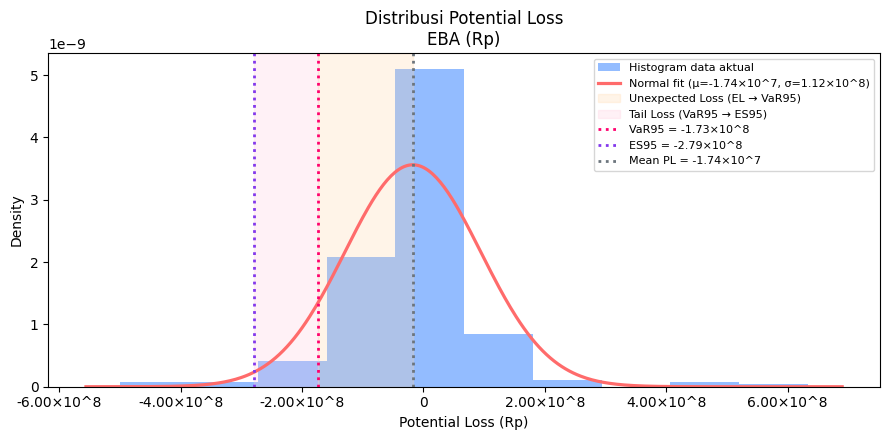

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.stats import norm

# =========================
# 1. DATA & SETTINGS
# =========================

file_path = "PL_EBA.xlsx"      # ganti sesuai file
df = pd.read_excel(file_path)

ASSET_COL  = "PL_EBA"          # ganti dengan nama kolom PL kamu
ASSET_NAME = "EBA"             # nama untuk judul

if ASSET_COL not in df.columns:
    raise ValueError(f"Kolom {ASSET_COL} tidak ditemukan di file Excel.")

series = df[ASSET_COL].dropna()

# =========================
# 2. METRIK RISIKO (α = 5%)
# =========================

alpha = 0.95                   # confidence level
mu = series.mean()
sigma = series.std(ddof=1)

# VaR95 di ruang PL (quantile 5% kiri)
q05 = series.quantile(1 - alpha)    # = 0.05

# Expected Shortfall 95%:
# 1) definisikan loss = -PL
losses = -series
loss_q95 = np.quantile(losses, alpha)        # kuantil 95% di ruang loss
ES95_loss = losses[losses >= loss_q95].mean()
ES95_pl = -ES95_loss                         # balik ke koordinat PL

# =========================
# 3. FORMAT SCIENTIFIC (a × 10^b)
# =========================

def sci_fmt(x):
    if x == 0:
        return "0"
    exp = int(np.floor(np.log10(abs(x))))
    coeff = x / (10**exp)
    return f"{coeff:.2f}×10^{exp}"

axis_fmt = FuncFormatter(lambda val, pos: sci_fmt(val))

# =========================
# 4. COLOR PALETTE (Financial Professional)
# =========================

# COLOR PALETTE (Financial Professional)
# hist_color   = "#1f77b4"   # navy blue
# fit_color    = "#ffb000"   # gold
# ul_color     = "#f4d06f"   # soft gold
# tail_color   = "#e54b4b"   # warm red
# var_color    = "#2a5599"   # royal blue
# es_color     = "#9c1a1c"   # deep red
# mean_color   = "#4a4a4a"   # dark grey

# COLOR PALETTE (Teal Coral)
hist_color   = "#3a86ff"   
fit_color    = "#ff6b6b"   
ul_color     = "#ffd6a5"   
tail_color   = "#ffc8dd"   
var_color    = "#ff006e"   
es_color     = "#8338ec"   
mean_color   = "#6c757d"   

# =========================
# 5. PLOT
# =========================

# Range x hanya dari data, dengan sedikit padding
x_min = series.min()
x_max = series.max()
x_range = x_max - x_min
x = np.linspace(x_min - 0.05 * x_range,
                x_max + 0.05 * x_range,
                400)
y = norm.pdf(x, mu, sigma)

fig, ax = plt.subplots(figsize=(9, 4.5))

# Histogram PL
ax.hist(series,
        bins=10,
        density=True,
        alpha=0.55,
        color=hist_color,
        label="Histogram data aktual")

# Normal fit
ax.plot(x, y,
        linewidth=2.3,
        color=fit_color,
        label=f"Normal fit (μ={sci_fmt(mu)}, σ={sci_fmt(sigma)})")

# === ZONA UL95: dari Mean (mu) ke VaR95 ===
ul_left  = min(mu, q05)
ul_right = max(mu, q05)

ax.axvspan(ul_left, ul_right,
           alpha=0.25,
           color=ul_color,
           label="Unexpected Loss (EL → VaR95)")

# === ZONA TAIL LOSS 95%: dari VaR95 ke ES95 ===
tail_left  = min(q05, ES95_pl)
tail_right = max(q05, ES95_pl)

ax.axvspan(tail_left, tail_right,
           alpha=0.25,
           color=tail_color,
           label="Tail Loss (VaR95 → ES95)")

# === Garis VaR95 ===
ax.axvline(q05,
           linestyle=":",
           linewidth=2,
           color=var_color,
           label=f"VaR95 = {sci_fmt(q05)}")

# === Garis ES95 ===
ax.axvline(ES95_pl,
           linestyle=":",
           linewidth=2,
           color=es_color,
           label=f"ES95 = {sci_fmt(ES95_pl)}")

# === Garis Mean (EL di ruang PL) ===
ax.axvline(mu,
           linestyle=":",
           linewidth=2,
           color=mean_color,
           label=f"Mean PL = {sci_fmt(mu)}")

# Format sumbu x sebagai a × 10^b
ax.xaxis.set_major_formatter(axis_fmt)

ax.set_title(f"Distribusi Potential Loss\n{ASSET_NAME} (Rp)")
ax.set_xlabel("Potential Loss (Rp)")
ax.set_ylabel("Density")
ax.grid(False)
ax.legend(fontsize=8, frameon=True)
plt.tight_layout()
plt.show()

## 2. Graph of Obligasi Korporasi

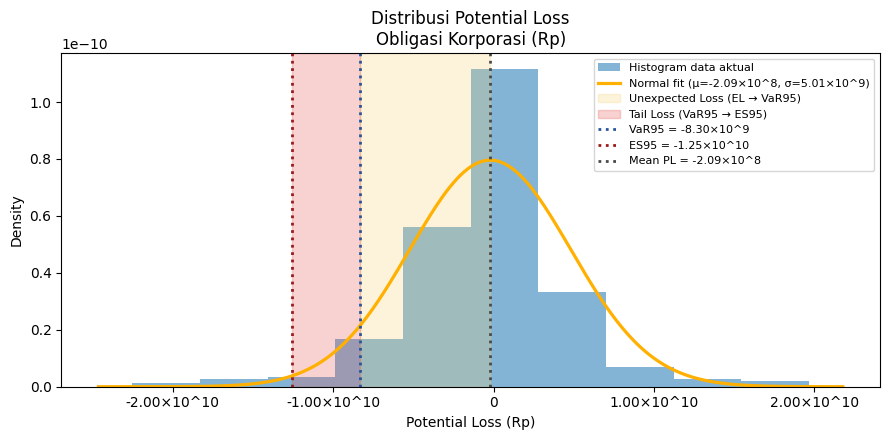

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.stats import norm

# =========================
# 1. DATA & SETTINGS
# =========================

file_path = "PL_CorpBond.xlsx"      # ganti sesuai file
df = pd.read_excel(file_path)

ASSET_COL  = "PL_CorpBond"          # ganti dengan nama kolom PL kamu
ASSET_NAME = "Obligasi Korporasi"             # nama untuk judul

if ASSET_COL not in df.columns:
    raise ValueError(f"Kolom {ASSET_COL} tidak ditemukan di file Excel.")

series = df[ASSET_COL].dropna()

# =========================
# 2. METRIK RISIKO (α = 5%)
# =========================

alpha = 0.95                   # confidence level
mu = series.mean()
sigma = series.std(ddof=1)

# VaR95 di ruang PL (quantile 5% kiri)
q05 = series.quantile(1 - alpha)    # = 0.05

# Expected Shortfall 95%:
# 1) definisikan loss = -PL
losses = -series
loss_q95 = np.quantile(losses, alpha)        # kuantil 95% di ruang loss
ES95_loss = losses[losses >= loss_q95].mean()
ES95_pl = -ES95_loss                         # balik ke koordinat PL

# =========================
# 3. FORMAT SCIENTIFIC (a × 10^b)
# =========================

def sci_fmt(x):
    if x == 0:
        return "0"
    exp = int(np.floor(np.log10(abs(x))))
    coeff = x / (10**exp)
    return f"{coeff:.2f}×10^{exp}"

axis_fmt = FuncFormatter(lambda val, pos: sci_fmt(val))

# =========================
# 4. COLOR PALETTE (Financial Professional)
# =========================

# COLOR PALETTE (Financial Professional)
hist_color   = "#1f77b4"   # navy blue
fit_color    = "#ffb000"   # gold
ul_color     = "#f4d06f"   # soft gold
tail_color   = "#e54b4b"   # warm red
var_color    = "#2a5599"   # royal blue
es_color     = "#9c1a1c"   # deep red
mean_color   = "#4a4a4a"   # dark grey

# # COLOR PALETTE (Teal Coral)
# hist_color   = "#3a86ff"   
# fit_color    = "#ff6b6b"   
# ul_color     = "#ffd6a5"   
# tail_color   = "#ffc8dd"   
# var_color    = "#ff006e"   
# es_color     = "#8338ec"   
# mean_color   = "#6c757d"   

# =========================
# 5. PLOT
# =========================

# Range x hanya dari data, dengan sedikit padding
x_min = series.min()
x_max = series.max()
x_range = x_max - x_min
x = np.linspace(x_min - 0.05 * x_range,
                x_max + 0.05 * x_range,
                400)
y = norm.pdf(x, mu, sigma)

fig, ax = plt.subplots(figsize=(9, 4.5))

# Histogram PL
ax.hist(series,
        bins=10,
        density=True,
        alpha=0.55,
        color=hist_color,
        label="Histogram data aktual")

# Normal fit
ax.plot(x, y,
        linewidth=2.3,
        color=fit_color,
        label=f"Normal fit (μ={sci_fmt(mu)}, σ={sci_fmt(sigma)})")

# === ZONA UL95: dari Mean (mu) ke VaR95 ===
ul_left  = min(mu, q05)
ul_right = max(mu, q05)

ax.axvspan(ul_left, ul_right,
           alpha=0.25,
           color=ul_color,
           label="Unexpected Loss (EL → VaR95)")

# === ZONA TAIL LOSS 95%: dari VaR95 ke ES95 ===
tail_left  = min(q05, ES95_pl)
tail_right = max(q05, ES95_pl)

ax.axvspan(tail_left, tail_right,
           alpha=0.25,
           color=tail_color,
           label="Tail Loss (VaR95 → ES95)")

# === Garis VaR95 ===
ax.axvline(q05,
           linestyle=":",
           linewidth=2,
           color=var_color,
           label=f"VaR95 = {sci_fmt(q05)}")

# === Garis ES95 ===
ax.axvline(ES95_pl,
           linestyle=":",
           linewidth=2,
           color=es_color,
           label=f"ES95 = {sci_fmt(ES95_pl)}")

# === Garis Mean (EL di ruang PL) ===
ax.axvline(mu,
           linestyle=":",
           linewidth=2,
           color=mean_color,
           label=f"Mean PL = {sci_fmt(mu)}")

# Format sumbu x sebagai a × 10^b
ax.xaxis.set_major_formatter(axis_fmt)

ax.set_title(f"Distribusi Potential Loss\n{ASSET_NAME} (Rp)")
ax.set_xlabel("Potential Loss (Rp)")
ax.set_ylabel("Density")
ax.grid(False)
ax.legend(fontsize=8, frameon=True)
plt.tight_layout()
plt.show()